# 01. Custom Dataset


Official documentation: https://docs.pytorch.org/docs/stable/data.html

Reading documentation helps your brain.

There are two types of datasets in PyTorch:
* map-style , but I like to call them list-style, because they act as if they were lists: https://docs.pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
* iterable-style: https://docs.pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset


In [27]:
import torch
import torchvision

from torchvision.transforms import v2
from torch.utils.data import Dataset, IterableDataset

import matplotlib.pyplot as plt

---

## Map-stype datasets

In [19]:
class MyDataset(Dataset):
    def __init__(self):
        self.data = [1, 2, 3, 4, 5]
        self.labels = ["odd", "even", "odd", "even", "odd"]

    def __len__(self) -> int:
        # DataLoader uses this to know dataset size
        return len(self.data)

    def __getitem__(self, i: int):
        # returns one sample by index
        return self.data[i], self.labels[i]

dataset = MyDataset()
for data, label in dataset:
    print(data, label)

1 odd
2 even
3 odd
4 even
5 odd


In [20]:
# We can use it as a list
dataset[0]

(1, 'odd')

In [21]:
dataset[-1]

(5, 'odd')

MNIST example with even and odd

In [25]:
class MNIST_even_odd(Dataset):
    def __init__(self, root: str = "./data", train: bool = True):
        self.base = torchvision.datasets.MNIST(
            root=root,
            train=train,
            download=True,
            transform=v2.Compose([  # Ignore this for now. It's used to transform the raw images to 0-1 tensors
                v2.ToImage(),  # This transforms the PIL image to a tensor.
                v2.ToDtype(torch.float32, scale=True),  # This scales the pixel values to be between 0 and 1.
            ]),
        )

    def __len__(self):
        # size of wrapped dataset
        return len(self.base)

    def __getitem__(self, i: int):
        image, label = self.base[i]  # We extract data from the wrapped dataset
        parity = "even" if label % 2 == 0 else "odd"
        return image, label, parity


mod4 = MNIST_even_odd(train=True)
print("Items in dataset:", len(mod4))
print("First item:", mod4[0][0].shape)
print("First label:", mod4[0][1:])

Items in dataset: 60000
First item: torch.Size([1, 28, 28])
First label: (5, 'odd')


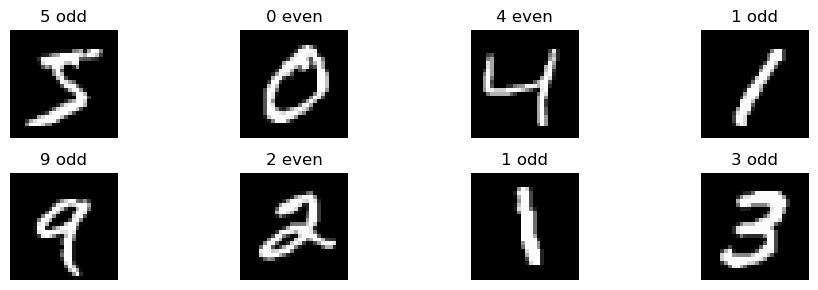

In [24]:
plt.figure(figsize=(10, 3))
for i in range(8):
    image, label, parity = mod4[i]
    plt.subplot(2, 4, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"{label} {parity}")
    plt.axis('off')
plt.tight_layout()

---

## Iterable datasets

In [34]:
class StreamedPairs(IterableDataset):
    def __iter__(self):
        # infinite stream; consumer should break
        while True:
            x = torch.rand(1)
            y = x > 0.5
            yield x, y

stream = StreamedPairs()

# consume a few batches
for i, (a, b) in enumerate(stream):
    print(i, a, b)
    if i >= 2:
        break


0 tensor([0.3026]) tensor([False])
1 tensor([0.3134]) tensor([False])
2 tensor([0.7068]) tensor([True])
